In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./Data/분야별/모든분야.csv')
df.head()

,part,title,date,rating,text
0,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-02,1.0,내가 이 책을 왜 샀지. 생각하게 하는 책이에요. 깊이도 없고 이론적 바탕도 없고 ...
1,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-03,1.0,최근 구매한 책중 가장 기발했네요. 본인일기라고 하신 댓글에 공감하구요. 인스타 광...
2,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-12,4.0,모든 엄마가 공감하고 직접 적용해 볼 수 있는 하브루타 대화를 제시한다
3,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-09,4.0,이해하기쉽고 편하게 접근할수있게 하브루타교육법을 본인의 경험과함께 잘풀어낸책이네요~...
4,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-07-31,4.0,그냥 쭉쭉 읽어 내려가는 책이다라고 표현하기에는 그렇고 많은 생각을 하게 하는 책이...


# 평점 분포도

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

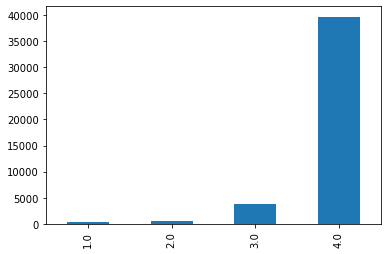

In [5]:
df.rating.value_counts().sort_index().plot(kind='bar')
plt.show()

현재 압도적으로 4점짜리 리뷰가 많음 => "불균형 데이터셋"

이러면 성능이 잘 나오기 어렵고 모형의 성능을 정확도로 층정하기 어렵다는는 특징을 지님

In [14]:
print("별점 1점 개수: ",len(df[df['rating']==1.0]))
print("별점 2점 개수: ",len(df[df['rating']==2.0]))
print("별점 3점 개수: ",len(df[df['rating']==3.0]))
print("별점 4점 개수: ",len(df[df['rating']==4.0]))

별점 1점 개수:  392
별점 2점 개수:  546
별점 3점 개수:  3746
별점 4점 개수:  39691


In [19]:
negative_df = pd.concat([df[df['rating']==1.0],df[df['rating']==2.0]],ignore_index=True)
positive_df = pd.concat([df[df['rating']==4.0],df[df['rating']==4.0]],ignore_index=True)

In [21]:
negative_df.head()

,part,title,date,rating,text
0,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-02,1.0,내가 이 책을 왜 샀지. 생각하게 하는 책이에요. 깊이도 없고 이론적 바탕도 없고 ...
1,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-03,1.0,최근 구매한 책중 가장 기발했네요. 본인일기라고 하신 댓글에 공감하구요. 인스타 광...
2,가정생활,금쪽이들의 진짜 마음속,2022-06-02,1.0,너무좋아요! 잘읽혀져요
3,가정생활,똑게육아,2022-08-19,1.0,수면교육 배우려고 구매했는데 내용은 좋았지만 정작 도움이 하나도 되지 않았어요.. ...
4,가정생활,세상에서 제일 재밌는 종이접기,2020-12-29,1.0,어려워요


In [22]:
positive_df.head()

,part,title,date,rating,text
0,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-12,4.0,모든 엄마가 공감하고 직접 적용해 볼 수 있는 하브루타 대화를 제시한다
1,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-09,4.0,이해하기쉽고 편하게 접근할수있게 하브루타교육법을 본인의 경험과함께 잘풀어낸책이네요~...
2,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-07-31,4.0,그냥 쭉쭉 읽어 내려가는 책이다라고 표현하기에는 그렇고 많은 생각을 하게 하는 책이...
3,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-07-27,4.0,스스로 생각하고 해결하는 아이로 키울 수 있었으면 좋겠네요.
4,가정생활,내 아이를 바꾸는 위대한 질문 하브루타,2022-08-29,4.0,잘 읽히는데 깊이가 조금 부족해요


# 부정, 긍정 리뷰 차이

In [23]:
print("부정리뷰 size: ", len(negative_df))
print("긍정리뷰 size: ", len(positive_df))

부정리뷰 size:  938
긍정리뷰 size:  79382


In [26]:
negative_df.to_csv('./Data/분야별/부정_리뷰.csv',encoding='utf-8-sig')
positive_df.to_csv('./Data/분야별/긍정_리뷰.csv',encoding='utf-8-sig')